# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:F", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(df.columns)

df=df[df["Base_hours"]==24]
df

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff
0,80.70,0.6210,24,1064,85.700
1,81.60,0.6280,24,1057,85.700
2,78.00,0.6310,24,1072,85.700
3,81.00,0.4790,24,1086,85.540
4,81.10,0.4830,24,1087,85.570
...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.480
271,62.30,0.7090,24,1073,84.230
272,62.79,0.7565,24,1056,84.019
273,55.00,0.8900,24,1077,84.010


In [3]:
y=df["Gen_MWH"]
y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [4]:
df=df.drop(columns="Gen_MWH")
df

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff
0,80.70,0.6210,24,85.700
1,81.60,0.6280,24,85.700
2,78.00,0.6310,24,85.700
3,81.00,0.4790,24,85.540
4,81.10,0.4830,24,85.570
...,...,...,...,...
270,60.69,0.6341,24,84.480
271,62.30,0.7090,24,84.230
272,62.79,0.7565,24,84.019
273,55.00,0.8900,24,84.010


Text(0.5, 1.0, 'KMeans Pre Analysis')

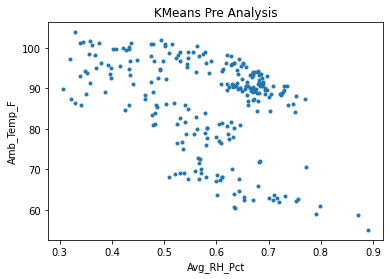

In [5]:
# Plot data to get an insight, what model can fit here?
%matplotlib inline
#df[["Amb_Temp_F","Avg_RH_Pct"]].hist(figsize=(18,5))
colX="Avg_RH_Pct"
colY="Amb_Temp_F"
#colX, colY = colY, colX

plt.plot(df[colX],
         df[colY],
         '.')
plt.xlabel(df[colX].name)
plt.ylabel(df[colY].name)
plt.title("KMeans Pre Analysis")




In [6]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [7]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

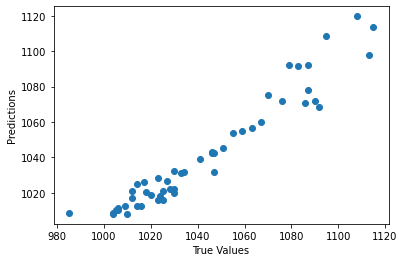

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [9]:
#d=y_test-predictions
y_test.values-predictions

array([  5.93473816,   9.03264084,  15.21054118, -11.69359982,
         7.28898603,  -4.01886701,   8.8581774 ,   1.76846344,
         1.60648438,  -8.81120905,  -5.41986957,  -4.46429421,
        15.29060677,   4.10345239,  10.16142062, -12.96173925,
         2.04956513,  -5.23767855,  -2.11865789,  -2.24674673,
        -4.11644189,   1.91819215,  -4.97653958,  15.15923666,
       -10.64149793,  -3.72364891,   3.96902548,  -5.60812012,
        23.83138833,   3.24751753,   1.25444996,   4.36512645,
         6.91589503,   1.53094416,   5.7630397 , -13.58949951,
        -5.03020469,  -4.96760371,  -8.96453378,   1.49361368,
        -8.58955366,   1.96430001,   5.97265367,   6.24357412,
         3.16737899,   8.16541501,  18.00967858,   0.28032522,
       -23.56962537,   4.33477197,   3.42089354])

In [10]:
df=df.drop(columns="Base_hours")
df

,Amb_Temp_F,Avg_RH_Pct,Comp_eff
0,80.70,0.6210,85.700
1,81.60,0.6280,85.700
2,78.00,0.6310,85.700
3,81.00,0.4790,85.540
4,81.10,0.4830,85.570
...,...,...,...
270,60.69,0.6341,84.480
271,62.30,0.7090,84.230
272,62.79,0.7565,84.019
273,55.00,0.8900,84.010


In [11]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 3) (200,)
(51, 3) (51,)


In [12]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

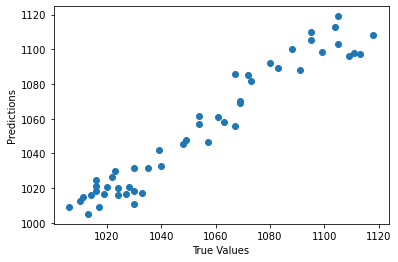

In [13]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:
type(predictions)
predictions=predictions.astype(int)
np.dstack((y_test.values,predictions,(y_test.values-predictions)))

array([[[1019, 1016,    3],
        [1083, 1089,   -6],
        [1069, 1070,   -1],
        [1013, 1005,    8],
        [1054, 1061,   -7],
        [1030, 1018,   12],
        [1022, 1026,   -4],
        [1113, 1097,   16],
        [1040, 1032,    8],
        [1073, 1081,   -8],
        [1080, 1091,  -11],
        [1063, 1058,    5],
        [1014, 1015,   -1],
        [1024, 1020,    4],
        [1017, 1008,    9],
        [1095, 1105,  -10],
        [1035, 1031,    4],
        [1048, 1045,    3],
        [1016, 1018,   -2],
        [1024, 1016,    8],
        [1061, 1060,    1],
        [1069, 1068,    1],
        [1095, 1110,  -15],
        [1006, 1009,   -3],
        [1105, 1103,    2],
        [1023, 1029,   -6],
        [1016, 1021,   -5],
        [1030, 1031,   -1],
        [1028, 1020,    8],
        [1088, 1099,  -11],
        [1072, 1085,  -13],
        [1109, 1096,   13],
        [1030, 1010,   20],
        [1067, 1085,  -18],
        [1091, 1087,    4],
        [1067, 1055,

In [15]:
np.average((y_test.values-predictions))

0.8627450980392157